In [4]:
import pandas as pd
import numpy as np  #for mathematical calculation
import matplotlib.pyplot as plt
import seaborn as sns     #for data visualization
%matplotlib inline
import warnings #to ignore any warnings
plt.rcParams['figure.figsize']=(12.0,9.0)

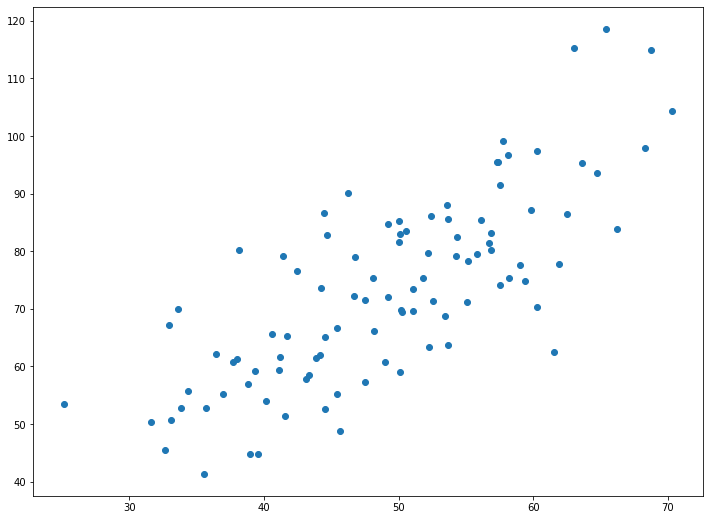

In [11]:
data=pd.read_csv('data.csv')
X=data.iloc[:,0]
Y=data.iloc[:,1]
plt.scatter(X,Y)
plt.show()

In [12]:
#building the model
m=0
c=0
L=0.0001 #the learning rate
epoch=1000 #the number of iteration to perform gradient descent
n=float(len(X))

#performance of gradient descent
for i in range(epoch):
    Y_pred=m*X+c #the current prediction  value of c
    D_m=(-2/n)*sum(X*(Y-Y_pred)) #derivative wrt M
    D_c=(-2/n)*sum(Y-Y_pred)
    m=m-L*D_m
    c=c-L*D_c
print(m,c)    

1.4796491688889395 0.10148121494753734


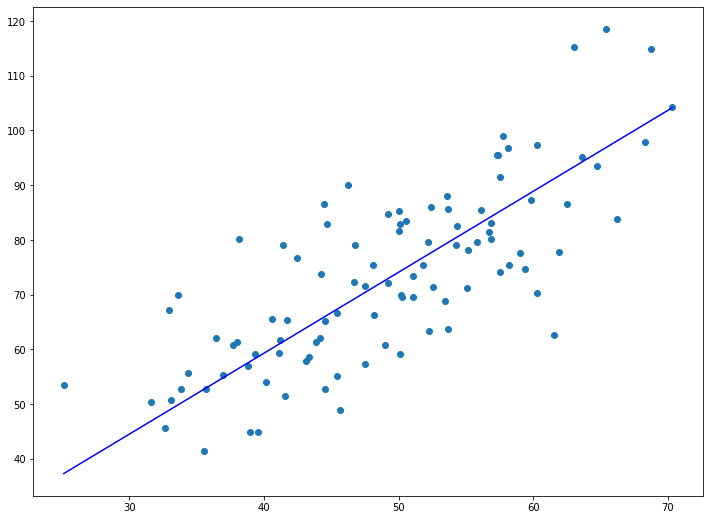

In [13]:
Y_pred=m*X+c
plt.scatter(X,Y)
plt.plot([min(X),max(X)],[min(Y_pred),max(Y_pred)],color='blue')#predicted
plt.show()

# logistic regression

In [14]:
import pandas as pd
import numpy as np  #for mathematical calculation
import matplotlib.pyplot as plt
import seaborn as sns     #for data visualization
%matplotlib inline

In [15]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
titanic_data=pd.read_csv("titanic_data.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
titanic_data=titanic_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']]
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
0,0,3,male,22.0,1,0,S,7.2500
1,1,1,female,38.0,1,0,C,71.2833
2,1,3,female,26.0,0,0,S,7.9250
3,1,1,female,35.0,1,0,S,53.1000
4,0,3,male,35.0,0,0,S,8.0500


In [41]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

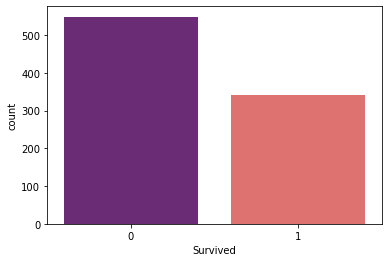

In [42]:
sns.countplot(x='Survived',data=titanic_data,palette='magma')

In [43]:
titanic_data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Embarked     True
Fare        False
dtype: bool

In [44]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
Fare          0
dtype: int64

In [45]:
titanic_data['Age'].fillna((titanic_data['Age'].mean()),inplace=True)

In [46]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
Fare        0
dtype: int64

In [47]:
titanic_data.dropna(inplace=True)

In [48]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    object 
 7   Fare      889 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [49]:
titanic_data_X=titanic_data[['Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']]
titanic_data_Y=titanic_data[['Survived']]


In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(titanic_data_X,titanic_data_Y,test_size=0.2)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

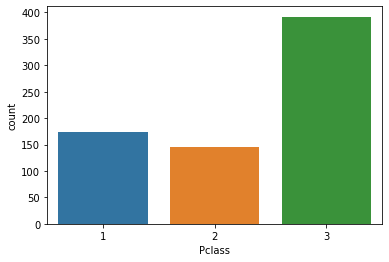

In [51]:
sns.countplot(x="Pclass",data=X_train)

C:\Users\Naani\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

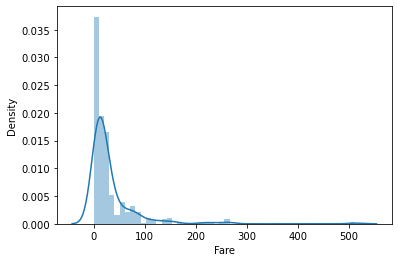

In [61]:
sns.distplot(X_train['Fare'])

C:\Users\Naani\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

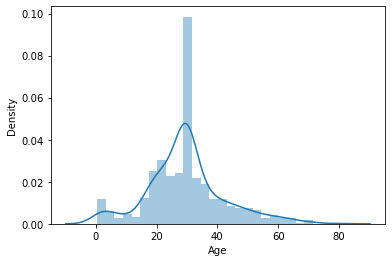

In [62]:
sns.distplot(X_train['Age'])

In [53]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
#we perform z_score normalization on both these features
age_scalar=StandardScaler()
age_scalar.fit(pd.DataFrame(X_train['Age']))

StandardScaler()

In [64]:
X_train[["Age"]]=age_scalar.transform(X_train[["Age"]])
warnings.filterwarnings("ignore")

<ipython-input-64-115ea4bb62ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["Age"]]=age_scalar.transform(X_train[["Age"]])
C:\Users\Naani\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


<AxesSubplot:xlabel='Age', ylabel='Density'>

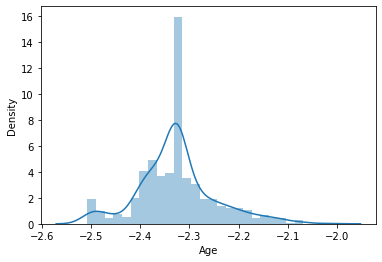

In [66]:
sns.distplot(X_train['Age'])

In [67]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
#we perform z_score normalization on both these features
Fare_scalar=StandardScaler()
Fare_scalar.fit(pd.DataFrame(X_train['Age']))

StandardScaler()

In [68]:
X_train[["Fare"]]=age_scalar.transform(X_train[["Fare"]])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

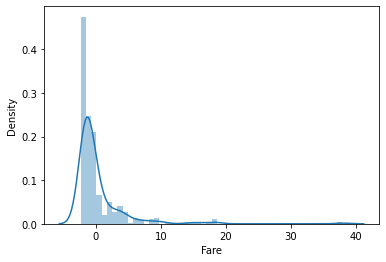

In [69]:
sns.distplot(X_train['Fare'])

In [71]:
X_train['Sex']=X_train['Sex'].map({'female':0,"male":1})

In [72]:
X_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
282,3,1,-2.411253,0,0,S,-1.580477
766,1,1,-2.326619,0,0,C,0.785406
579,3,1,-2.312404,0,0,S,-1.704273
670,2,0,-2.262979,1,1,S,0.738245
653,3,0,-2.326619,0,0,Q,-1.711803


In [77]:
embarked_encoder=LabelEncoder()
embarked_encoder.fit(pd.DataFrame(X_train[['Embarked']]))

LabelEncoder()

In [78]:
X_train[['Embarked']]=embarked_encoder.transform(X_train[['Embarked']])

In [79]:
X_train.head(5)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
282,3,1,-2.411253,0,0,2,-1.580477
766,1,1,-2.326619,0,0,0,0.785406
579,3,1,-2.312404,0,0,2,-1.704273
670,2,0,-2.262979,1,1,2,0.738245
653,3,0,-2.326619,0,0,1,-1.711803


<AxesSubplot:>

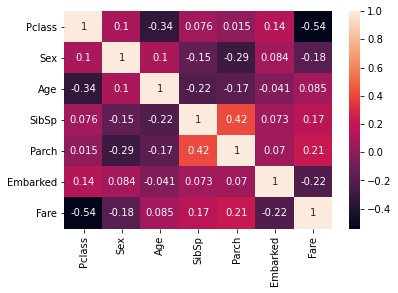

In [81]:
sns.heatmap(X_train.corr(),annot=True)

In [82]:
del X_train['Pclass']

In [83]:
X_train.head(2)

,Sex,Age,SibSp,Parch,Embarked,Fare
282,1,-2.411253,0,0,2,-1.580477
766,1,-2.326619,0,0,0,0.785406


In [84]:
X_train_original=X_train
X_train=X_train.values
Y_train=Y_train.values

In [85]:
logistic_regression=LogisticRegression()


In [86]:
logistic_regression.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
coefficient=pd.concat([pd.DataFrame(X_train_original.columns),pd.DataFrame(np.transpose(logistic_regression.coef_))],axis=1)
coeficient.columns=['Feature','Coefficient']
coefficients